In [35]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

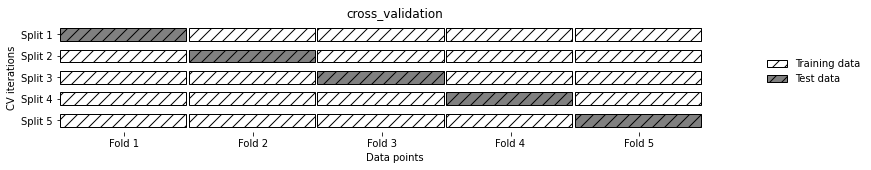

In [2]:
mglearn.plots.plot_cross_validation()

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print(scores)

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target,cv=10)
print(scores)

[1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [5]:
scores.mean()

0.9733333333333334

In [6]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
res

{'fit_time': array([0.02898765, 0.03894639, 0.0230372 , 0.03398728, 0.02603483]),
 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.00099993]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [7]:
res_df = pd.DataFrame(res)
print(res_df)
print(res_df.mean())

   fit_time  score_time  test_score  train_score
0  0.028988       0.000    0.966667     0.966667
1  0.038946       0.000    1.000000     0.966667
2  0.023037       0.000    0.933333     0.983333
3  0.033987       0.000    0.966667     0.983333
4  0.026035       0.001    1.000000     0.975000
fit_time       0.030199
score_time     0.000200
test_score     0.973333
train_score    0.975000
dtype: float64


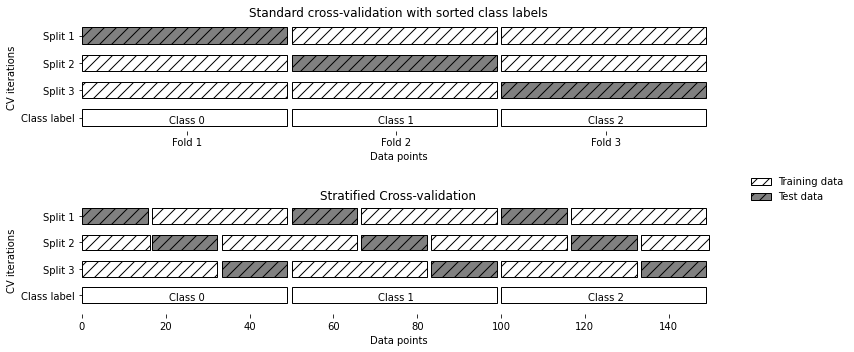

In [8]:
mglearn.plots.plot_stratified_cross_validation()

In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [10]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0.98, 0.96, 0.96])

In [11]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
scores.mean()

0.9666666666666667

In [12]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

best_score = 0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            best_parameters={'C':C, 'gamma':gamma}
            
print(best_score)
print(best_parameters)

0.9736842105263158
{'C': 100, 'gamma': 0.001}


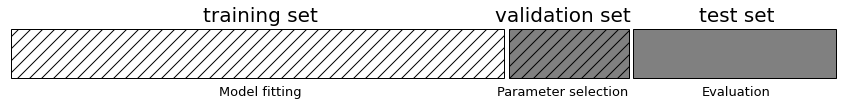

In [13]:
mglearn.plots.plot_threefold_split()

In [14]:
from sklearn.svm import SVC

X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=0)

best_score = 0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        
        if score > best_score:
            best_score = score
            best_parameters={'C':C, 'gamma':gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score = svm.score(X_test, y_test)
print(best_score)
print(best_parameters)
print(test_score)

1.0
{'C': 100, 'gamma': 0.001}
0.9736842105263158


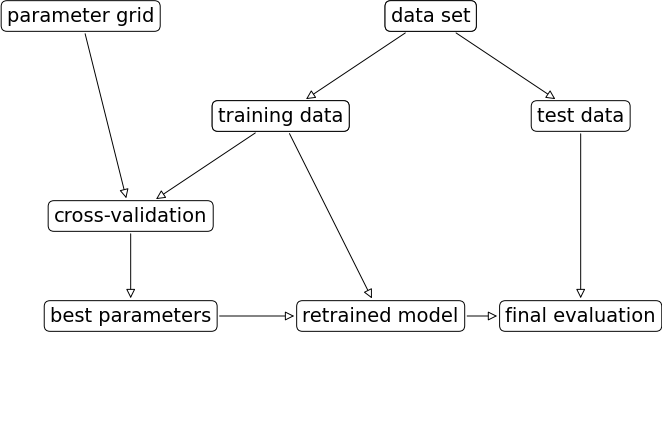

In [15]:
mglearn.plots.plot_grid_search_overview()

In [16]:
param_grid = {'C': [0.001,0.01,0.1,1,10,100],
             'gamma': [0.001,0.01,0.1,1,10,100]}

param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [17]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [18]:
grid_search

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [20]:
grid_search.score(X_test, y_test)

0.9736842105263158

In [21]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.1}
0.9731225296442687


In [22]:
import pandas as pd
pd.set_option('display.max_columns', None)

results = pd.DataFrame(grid_search.cv_results_)
# display
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.00119777,0.000999737,0.00138988,0.0010159,0.00120149
std_fit_time,0.000376655,3.8147e-07,0.000479766,0.000902905,0.000747991
mean_score_time,0.000600052,0,0,0.000399971,0.000199986
std_score_time,0.000489942,0,0,0.000489862,0.000399971
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


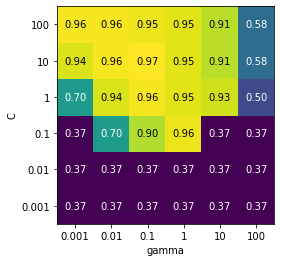

In [23]:
scores = np.array(results.mean_test_score).reshape(6,6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                     ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

In [24]:
param_grid = [{'kernel':['rbf'],
              'C': [0.001,0.01,0.1,1,10,100],
              'gamma': [0.001,0.01,0.1,1,10,100]},
             {'kernel':['linear'],
              'C': [0.001,0.01,0.1,1,10,100],}]
param_grid

[{'kernel': ['rbf'],
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
 {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [25]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.9731225296442687


In [26]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target==9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [27]:
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)


In [28]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)

[[402   1]
 [  6  41]]


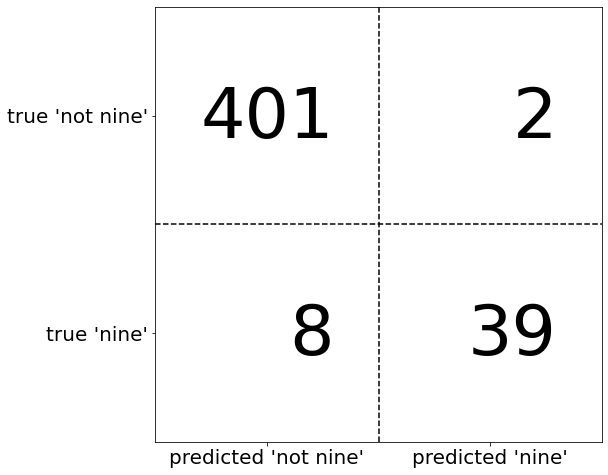

In [29]:
mglearn.plots.plot_confusion_matrix_illustration()

In [30]:
from sklearn.metrics import f1_score

In [31]:
f1_score(y_test, pred_logreg)

0.9213483146067415

Text(0, 0.5, 'recall')

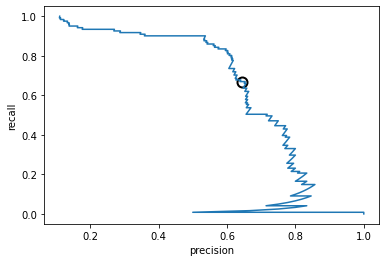

In [32]:
from sklearn.metrics import precision_recall_curve

X,y = make_blobs(n_samples=(4000,500), cluster_std=[7.0,2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold 0', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label='precision-recall curve')
plt.xlabel('precision')
plt.ylabel('recall')

In [34]:
from sklearn.metrics import classification_report

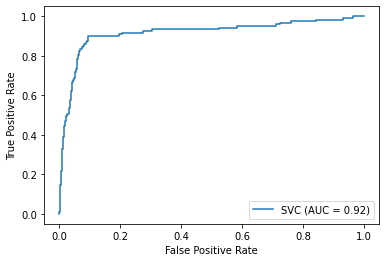

In [36]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc, X_test, y_test)


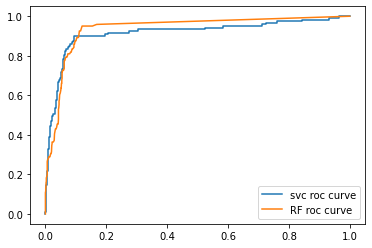

In [41]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='svc roc curve')
plt.plot(fpr_rf, tpr_rf, label='RF roc curve')
plt.legend()

In [42]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('rf auc: ', rf_auc)
print('svc auc: ', svc_auc)

rf auc:  0.9366953672911659
svc auc:  0.9162935036712654


In [44]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train,y_train)
pred = lr.predict(X_test)
print(lr.score(X_test, y_test))
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.9533333333333334
0.9533333333333334
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [48]:
f1_score(y_test, pred, average='micro')

0.9533333333333334

In [52]:
print('기본 평가 지표: ', cross_val_score(SVC(), digits.data, digits.target==9, cv=5))

explicit_acc = cross_val_score(SVC(), digits.data, digits.target==9, cv=5, scoring='accuracy')
print('정확도 지표: ', explicit_acc)

ap = cross_val_score(SVC(), digits.data, digits.target==9, cv=5, scoring='roc_auc')
print('평균 정밀도 지표: ', ap)

기본 평가 지표:  [0.975      0.99166667 1.         0.99442897 0.98050139]
정확도 지표:  [0.975      0.99166667 1.         0.99442897 0.98050139]
평균 정밀도 지표:  [0.99717078 0.99854252 1.         0.999828   0.98400413]
